<a href="https://colab.research.google.com/github/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/BIG_T4_Knn_Arvores_de_Decisao_e_Outros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **4. K-Vizinhos Mais Próximos, Árvores de Decisão e Outros Modelos**
---

Nesta trilha você vai aprender:

* Outros modelos de Classificação como K-Vizinhos Mais Próximos, Árvores de Decisão 
* Como aplicar a Validação Cruzada de Dados
* O que é Entropia e Ganho de Informação
 

Vamos retomar os problemas de aprendizado supervisionado, de regressão e classificação, para entender de modo geral como podemos empregar esses modelos com a biblioteca `scikit-learn`. Você vai aprender também como podemos avaliar mais adequadamente o desempenho desses modelos empregando conjuntos separados de treinamento e teste, e verificando outras métricas importantes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

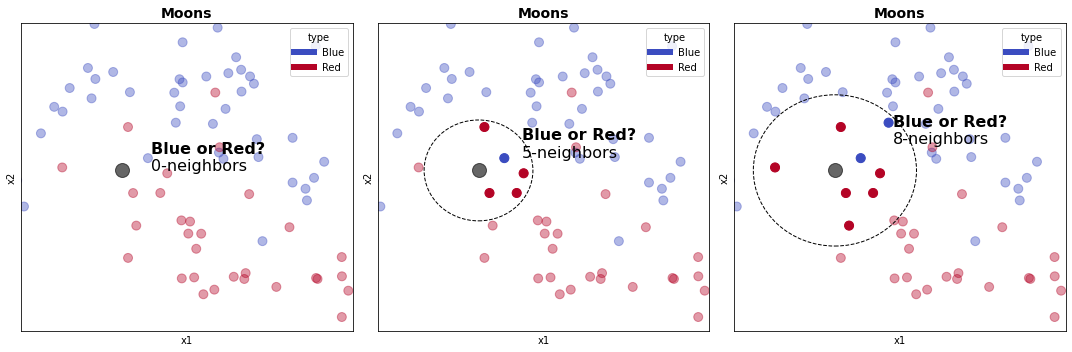

In [2]:
from sklearn.datasets import make_moons
from sklearn.neighbors import DistanceMetric
cmap_data = plt.cm.coolwarm 

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
moons = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

X, y = make_moons(n_samples=1, noise=0.25, random_state=123)
# amoon = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
amoon = pd.DataFrame({'x1':[-.2], 'x2':[.3]})

dist = DistanceMetric.get_metric('euclidean')
moons['distance'] = dist.pairwise(moons[['x1','x2']],amoon[['x1','x2']])

f, ax = plt.subplots(1,3,figsize=(15,5))
cmap_data = plt.cm.coolwarm 

for i in range(3):
  neighbors = moons.nsmallest([0,5,8][i],'distance')
  ax[i].scatter(moons.x1, moons.x2, c=moons.y, cmap=cmap_data, alpha=0.4, s=80)
  ax[i].scatter(neighbors.x1, neighbors.x2, c=neighbors.y, cmap=cmap_data, s=80)
  ax[i].plot(amoon.x1, amoon.x2, 'ko', markersize=14, alpha=0.6)

  a_circle = plt.Circle((amoon.x1, amoon.x2), neighbors.distance.max()+0.05, edgecolor='k', linestyle='dashed',fill=False)
  ax[i].add_artist(a_circle)

  ax[i].text(amoon.x1+0.2+i/10, amoon.x2+i/10,'Blue or Red?\n', weight='bold', fontsize=16)
  ax[i].text(amoon.x1+0.2+i/10, amoon.x2+i/10,' \n' + str([0,5,8][i]) + '-neighbors', fontsize=16)
  ax[i].set_title('Moons',weight='bold',fontsize=14)
  ax[i].set_xlabel("x1")
  ax[i].set_ylabel("x2")

  custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                  Line2D([0], [0], color=cmap_data(1.), lw=6)]
  ax[i].legend(custom_lines, ['Blue', 'Red'], loc='upper right',title='type')

  ax[i].set_xlim([-0.9,1.4])
  ax[i].set_ylim([-0.9,1.4])
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  # ax[i].axis('equal')

plt.tight_layout()
plt.show()


In [3]:
loans = pd.DataFrame({'age':[25,35,45,20,35,52,23,40,60,48,33],
                      'loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],
                      'default':[1,1,1,1,1,1,0,0,0,0,0] }) # 1='yes'

case  = pd.DataFrame({'age':[47],'loan':[142000]})

display(loans)
display(case)

,age,loan,default
0,25,40000,1
1,35,60000,1
2,45,80000,1
3,20,20000,1
4,35,120000,1
5,52,18000,1
6,23,95000,0
7,40,62000,0
8,60,100000,0
9,48,220000,0


,age,loan
0,47,142000


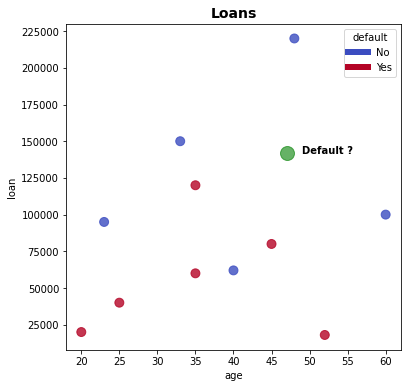

In [4]:
f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm 

ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()


In [5]:
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans[['age','loan']],case[['age','loan']])

loans['distance'] = d
display(loans.sort_values('distance'))

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012
6,23,95000,0,47000.006128
2,45,80000,1,62000.000032
9,48,220000,0,78000.000006
7,40,62000,0,80000.000306
1,35,60000,1,82000.000878
0,25,40000,1,102000.002373
3,20,20000,1,122000.002988


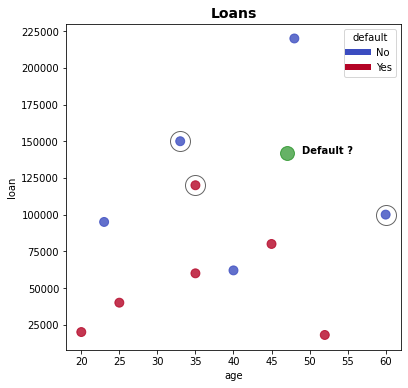

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012


In [6]:
k3_neighbors = loans.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm 

ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

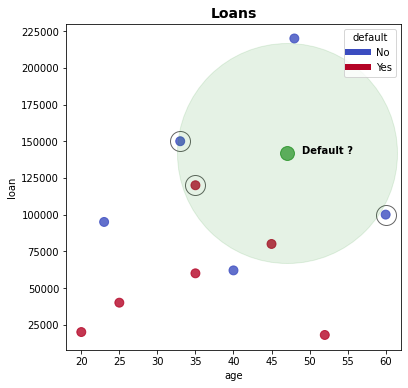

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012


In [7]:
f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm 

ax.plot(case.age, case.loan, 'go', markersize=220, alpha=0.10)
ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

In [8]:
from sklearn.preprocessing import minmax_scale

minmax_scale(loans[['age','loan']])

array([[0.125     , 0.10891089],
       [0.375     , 0.20792079],
       [0.625     , 0.30693069],
       [0.        , 0.00990099],
       [0.375     , 0.5049505 ],
       [0.8       , 0.        ],
       [0.075     , 0.38118812],
       [0.5       , 0.21782178],
       [1.        , 0.40594059],
       [0.7       , 1.        ],
       [0.325     , 0.65346535]])

In [9]:
minmax_scale(case)

array([[0., 0.]])

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(loans[['age','loan']]))

print(scaler.data_max_)

print(scaler.transform(loans[['age','loan']]))
print(scaler.transform(case))

MinMaxScaler(copy=True, feature_range=(0, 1))
[6.0e+01 2.2e+05]
[[0.125      0.10891089]
 [0.375      0.20792079]
 [0.625      0.30693069]
 [0.         0.00990099]
 [0.375      0.5049505 ]
 [0.8        0.        ]
 [0.075      0.38118812]
 [0.5        0.21782178]
 [1.         0.40594059]
 [0.7        1.        ]
 [0.325      0.65346535]]
[[0.675      0.61386139]]


In [11]:
loans.columns[0:1]

Index(['age'], dtype='object')

In [12]:
loans_scaled = pd.DataFrame(scaler.transform(loans[['age','loan']]),columns=loans.columns[0:2])
loans_scaled = pd.concat([loans_scaled,loans[['default']]],axis=1)
display(loans_scaled)

case_scaled = pd.DataFrame(scaler.transform(case),columns=case.columns[0:2])
display(case_scaled)

,age,loan,default
0,0.125,0.108911,1
1,0.375,0.207921,1
2,0.625,0.306931,1
3,0.000,0.009901,1
4,0.375,0.504950,1
5,0.800,0.000000,1
6,0.075,0.381188,0
7,0.500,0.217822,0
8,1.000,0.405941,0
9,0.700,1.000000,0


,age,loan
0,0.675,0.613861


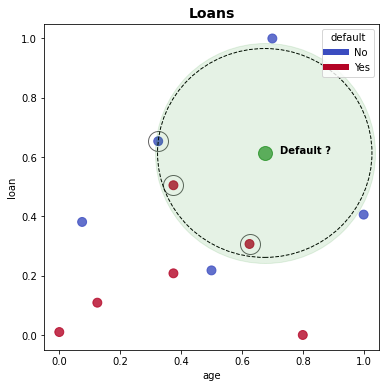

,age,loan,default,distance
2,0.625,0.306931,1,0.310977
4,0.375,0.504950,1,0.319158
10,0.325,0.653465,0,0.352234


In [13]:
dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans_scaled[['age','loan']],case_scaled[['age','loan']])

loans_scaled['distance'] = d

k3_neighbors_scaled = loans_scaled.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm 

ax.plot(case_scaled.age, case_scaled.loan, 'go', markersize=220, alpha=0.10)
ax.scatter(k3_neighbors_scaled.age, k3_neighbors_scaled.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans_scaled.age, loans_scaled.loan, c=loans_scaled.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case_scaled.age, case_scaled.loan, 'go', markersize=14, alpha=0.6)

a_circle = plt.Circle((case_scaled.age, case_scaled.loan), k3_neighbors_scaled.distance.max(), edgecolor='k', linestyle='dashed',fill=False)
ax.add_artist(a_circle)

plt.text(case_scaled.age+0.05, case_scaled.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors_scaled)

In [14]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler

X = loans[['age','loan']]      
y = loans.default   

scaler.fit(X)
X = scaler.transform(X) 
case_scaled = scaler.transform(case)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)

clf.fit(X, y)                 

y_pred = clf.predict(case_scaled)

default_pred = ['No','Yes'][y_pred[0]]
print('Default? ', default_pred)

Default?  Yes


In [15]:
loans['Duration'] = ['Short','Long','Short','Undefined','Long','Short','Long','Short','Undefined','Long','Short'] 

case['Duration'] = ['Short'] 

display(loans)
display(case)

,age,loan,default,distance,Duration
0,25,40000,1,102000.002373,Short
1,35,60000,1,82000.000878,Long
2,45,80000,1,62000.000032,Short
3,20,20000,1,122000.002988,Undefined
4,35,120000,1,22000.003273,Long
5,52,18000,1,124000.000101,Short
6,23,95000,0,47000.006128,Long
7,40,62000,0,80000.000306,Short
8,60,100000,0,42000.002012,Undefined
9,48,220000,0,78000.000006,Long


,age,loan,Duration
0,47,142000,Short


In [16]:
pd.get_dummies(loans,prefix='Duration')

,age,loan,default,distance,Duration_Long,Duration_Short,Duration_Undefined
0,25,40000,1,102000.002373,0,1,0
1,35,60000,1,82000.000878,1,0,0
2,45,80000,1,62000.000032,0,1,0
3,20,20000,1,122000.002988,0,0,1
4,35,120000,1,22000.003273,1,0,0
5,52,18000,1,124000.000101,0,1,0
6,23,95000,0,47000.006128,1,0,0
7,40,62000,0,80000.000306,0,1,0
8,60,100000,0,42000.002012,0,0,1
9,48,220000,0,78000.000006,1,0,0


In [17]:
pd.get_dummies(case,prefix='Duration')

,age,loan,Duration_Short
0,47,142000,1


In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(loans[['Duration']])

display(hot_encode.categories_)

display( pd.DataFrame(hot_encode.transform(loans[['Duration']] ).toarray(), columns = hot_encode.categories_) )
display( pd.DataFrame(hot_encode.transform(case[['Duration']] ).toarray(), columns = hot_encode.categories_) )


[array(['Long', 'Short', 'Undefined'], dtype=object)]

,Long,Short,Undefined
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


,Long,Short,Undefined
0,0.0,1.0,0.0


In [19]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = loans.drop(columns=['default','distance'])  
y = loans.default   

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(X[['Duration']])
X = pd.concat([ X, pd.DataFrame(hot_encode.transform(loans[['Duration']] ).toarray(), columns = hot_encode.categories_) ], axis=1 )
X = X.drop(columns=['Duration'])
case = pd.concat([ case, pd.DataFrame(hot_encode.transform(case[['Duration']] ).toarray(), columns = hot_encode.categories_) ], axis=1 )
case = case.drop(columns=['Duration'])

display(X)
display(case)

scaler.fit(X)
X = scaler.transform(X) 
case_scaled = scaler.transform(case)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)

clf.fit(X, y)                 

y_pred = clf.predict(case_scaled)

default_pred = ['No','Yes'][y_pred[0]]
print('Default? ', default_pred)

,age,loan,"(Long,)","(Short,)","(Undefined,)"
0,25,40000,0.0,1.0,0.0
1,35,60000,1.0,0.0,0.0
2,45,80000,0.0,1.0,0.0
3,20,20000,0.0,0.0,1.0
4,35,120000,1.0,0.0,0.0
5,52,18000,0.0,1.0,0.0
6,23,95000,1.0,0.0,0.0
7,40,62000,0.0,1.0,0.0
8,60,100000,0.0,0.0,1.0
9,48,220000,1.0,0.0,0.0


,age,loan,"(Long,)","(Short,)","(Undefined,)"
0,47,142000,0.0,1.0,0.0


Default?  No


# CASO: Breast Cancer biopsy

Este banco de dados de câncer de mama foi obtido dos Hospitais da Universidade de Wisconsin, que avaliou biópsias de tumores de mama em 699 pacientes até 1992;. Cada um dos nove atributos foi pontuado em uma escala de 1 a 10.

Fonte: https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv

Documentação: https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/biopsy.html

In [20]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
1,1000025,5,1,1,1,2,1.0,3,1,1,benign
2,1002945,5,4,4,5,7,10.0,3,2,1,benign
3,1015425,3,1,1,1,2,2.0,3,1,1,benign
4,1016277,6,8,8,1,3,4.0,3,7,1,benign
5,1017023,4,1,1,3,2,1.0,3,1,1,benign


## Preparação dos Dados

As variáveis preditoras são todas numéricas e não há, portanto, necessidade do hot encode dos atributos. Há entretanto valores ausentes.

In [21]:
df.isnull().sum() / len(df)

ID       0.00000
V1       0.00000
V2       0.00000
V3       0.00000
V4       0.00000
V5       0.00000
V6       0.02289
V7       0.00000
V8       0.00000
V9       0.00000
class    0.00000
dtype: float64

O percentual é pequeno e assim vamos simplesmente excluir os dados ausentes.

In [22]:
df['V6'] = df[['V6']].fillna(df['V6'].mean())
df.isnull().sum() / len(df)

ID       0.0
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
class    0.0
dtype: float64

## Aplicando o Modelo Knn

Aplicamos o modelo ajustando agora as entradas `X` e `y` para o modelo. O `max_iter` do regressor também foi ajustado para $10000$ uma vez que o conjunto de dados agora é maior e um maior número de iterações será necessário para convergência do parâmetros.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train, y_train)                 

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )

['benign' 'benign' 'malignant' 'benign' 'benign' 'malignant' 'benign'
 'benign' 'benign' 'benign'] ...
0.9699570815450643


## Predição de Novos Casos

Se considerarmos 0.85 um bom resultado podemos então aplicar o modelo para novos casos. Por exemplo, podemos fazer predição para pacientes homens e mulheres hipotéticos em que todos os indicadores estejam no percentil 0.75.

In [24]:
X_new = pd.DataFrame( df.drop(columns=['ID','class']).quantile([0.10, 0.25, 0.75, 0.90]) ).reset_index(drop=True)
display(X_new)
X_new_scaled = scaler.transform(X_new) 

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
2,6.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,1.0
3,9.0,9.0,8.0,8.0,6.0,10.0,7.0,9.0,3.0


In [25]:
clf.predict(X_new_scaled)

array(['benign', 'benign', 'malignant', 'malignant'], dtype=object)

In [26]:
X_new['predicted'] = clf.predict(X_new_scaled)
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,predicted
0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,benign
1,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,benign
2,6.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,1.0,malignant
3,9.0,9.0,8.0,8.0,6.0,10.0,7.0,9.0,3.0,malignant


# Métricas de Distância

Existem várias funções distância que podem ser aplicadas, não só aqui mas também em outros modelos (*knn*, *kmeans* etc.). A distância euclidiana é a mais aplicada, mas algumas algumas encontram maior uso em contextos específicos como a distância de **Hamming** para dados binários ou a distância **coseno** para análise de dados de documentos. 

Uma função é uma função distância se atende a 4 propriedades:

$i. d(x,y) \ge 0$

$ii. d(x,x) = 0$

$iii. d(x,y) = d(y,x)$

$iv.  d(x,y) \le d(x,z) + d(z,y)$

## Algumas funções distância empregadas em Ciência de Dados
Veja aqui algumas funções distância:


Distância Euclidiana $\qquad \qquad \qquad \qquad \qquad \qquad$ ${\displaystyle \| ab \| _ {2} = {\sqrt {\sum _ {i} (a_ {i} -b_ {i}) ^ {2}}}}$ 

Distância Euclidiana Quadrática $\qquad \qquad \qquad \qquad$  ${\displaystyle \| ab \| _ {2} ^ {2} = \sum _ {i} (a_ {i} -b_ {i}) ^ {2}} $

Distância de Manhattan $\qquad \qquad \qquad\qquad \qquad$ ${\displaystyle \| ab \| _ {1} = \sum _ {i} | a_ {i} -b_ {i} |}$

Distância Máxima $\qquad \qquad \qquad \qquad \qquad\qquad$  ${\displaystyle \| ab \| _ {\infty} = \max _ {i} | a_ {i} -b_ {i} |}$

Distância Minkowski $\qquad \qquad \qquad \qquad \qquad \qquad$ ${\displaystyle \| ab \| _ {Minkowski} = {(\sum _ {i} |a_ {i} -b_ {i}| ^ {p}})^{\frac{1}{p}}}$ 


# Distância de Hamming para Strings

```
def hamming_distance(s1, s2):
    assert len(s1) == len(s2)
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))
```
# Distância Cosseno
Aplicada para problemas em geral de busca e análise de documentos com representação vetorial (*bow*, *tf-idf* etc.).

$$ A B^t  = \|A\| \|B\| cos(\theta)$$

Então definimos a *similaridade* de dois vetores como:

$$ similarity(A,B) = cos(\theta) = \frac{A B^t }{\|A\| \|B\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }$$

E a distância:

$$ distance(A,B) = 1 - similarity(A,B)$$








In [27]:
def hamming_distance(string1, string2):
	dist_counter = 0
	for n in range(len(string1)):
		if string1[n] != string2[n]:
			dist_counter += 1
	return dist_counter

hamming_distance('ACGTACGT','ACGTTACG')

4

In [28]:
def hamming_distance2(string1, string2):
  return sum(xi != yi for xi, yi in zip(string1, string2))

hamming_distance2('ACGTACGT','ACGTTACG')

4

In [46]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

print( cosine_similarity([[0,1,1]],[[0,2,2]]) )
print( cosine_distances([[0,1,1]],[[0,2,2]]) )


[[1.]]
[[2.22044605e-16]]


In [43]:
dfd = pd.read_excel('http://meusite.mackenzie.br/rogerio/FCI22020/TFIDFExample2.xlsx',
                    skiprows=range(0,3),nrows=10,index_col=0,usecols=range(0,2),header=None).reset_index()
dfd.columns = ['tf(i,j)','Text']                   
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/FCI22020/TFIDFExample2.xlsx',
                   skiprows=range(0,16),nrows=9,index_col=0,usecols=range(0,14))
df[['Text']] = dfd[['Text']]
display(df)

,"tf(i,j)",system,user,graph,trees,response,EPS,interface,human,survey,computer,minors,time,Text
1,d1,0,0,0,0,0,0,1,1,0,1,0,0,Human machine interface for ABC computer appli...
2,d2,1,1,0,0,1,0,0,0,1,1,0,1,A survey of user opinion of computer system re...
3,d3,1,1,0,0,0,1,1,0,0,0,0,0,The EPS user interface management system.
4,d4,2,0,0,0,0,1,0,1,0,0,0,0,System and human system engineering testing in...
5,d5,0,1,0,0,1,0,0,0,0,0,0,1,Relation to user perceived response time to er...
6,d6,0,0,0,1,0,0,0,0,0,0,0,0,"The generation of random, binary, ordered trees."
7,d7,0,0,1,1,0,0,0,0,0,0,0,0,The intersection graph of paths in trees.
8,d8,0,0,1,1,0,0,0,0,0,0,1,0,Graph minors IV: Widths of trees and well-quas...
9,d9,0,0,1,0,0,0,0,0,1,0,1,0,Graph minors: A survey.


In [51]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

docs = df.drop(columns=['tf(i,j)','Text'])
doc = df[df['tf(i,j)'] == 'd1'].drop(columns=['tf(i,j)','Text'])

print( cosine_distances(docs, doc) )

[[0.        ]
 [0.76429774]
 [0.71132487]
 [0.76429774]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]]


In [52]:
dist = DistanceMetric.get_metric('euclidean')
print( dist.pairwise(docs, doc) )

[[0.        ]
 [2.64575131]
 [2.23606798]
 [2.64575131]
 [2.44948974]
 [2.        ]
 [2.23606798]
 [2.44948974]
 [2.44948974]]


In [89]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

for k, d in [(k,d) for k in range(2,10) for d in ['euclidean','manhattan','chebyshev']]:

  clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= d )

  clf.fit(X_train, y_train)                 

  y_pred = clf.predict(X_test)

  print( k, d, np.round( clf.score(X,y), 4) )

2 euclidean 0.9614
2 manhattan 0.9642
2 chebyshev 0.9614
3 euclidean 0.97
3 manhattan 0.97
3 chebyshev 0.9671
4 euclidean 0.9628
4 manhattan 0.9614
4 chebyshev 0.9657
5 euclidean 0.9714
5 manhattan 0.9642
5 chebyshev 0.9671
6 euclidean 0.9671
6 manhattan 0.9585
6 chebyshev 0.9685
7 euclidean 0.9685
7 manhattan 0.9642
7 chebyshev 0.9685
8 euclidean 0.9657
8 manhattan 0.9628
8 chebyshev 0.97
9 euclidean 0.9657
9 manhattan 0.9642
9 chebyshev 0.9657


In [130]:
scores_means = {}

for k, d in [(k,d) for k in range(2,9) for d in ['euclidean','chebyshev']]:
  
  scores = []
  for i in range(0,100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

    clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= d )

    clf.fit(X_train, y_train)                 

    y_pred = clf.predict(X_test)
    
    scores.append(clf.score(X,y))

  scores_means[(k,d)] = np.mean(scores)
  
scores_means = pd.DataFrame(scores_means.values(), index=scores_means.keys()).reset_index()
scores_means.columns = ['k','metric','score']

display(scores_means)
print('\nBest result:\n')
display(scores_means.nlargest(1,'score'))

,k,metric,score
0,2,euclidean,0.961373
1,2,chebyshev,0.961373
2,3,euclidean,0.969957
3,3,chebyshev,0.967096
4,4,euclidean,0.962804
5,4,chebyshev,0.965665
6,5,euclidean,0.971388
7,5,chebyshev,0.967096
8,6,euclidean,0.967096
9,6,chebyshev,0.968526



Best result:



,k,metric,score
6,5,euclidean,0.971388


In [126]:
scores_means.columns = ['k','metric','score']

In [127]:
scores_means

,k,metric,score
0,2,euclidean,0.961373
1,2,chebyshev,0.961373
2,3,euclidean,0.969957
3,3,chebyshev,0.967096
4,4,euclidean,0.962804
5,4,chebyshev,0.965665


In [114]:
scores_means.colnames

['k', 'metric', 'score']

In [106]:
pd.DataFrame(scores_means.values(), index=scores_means.keys()).reset_index()


,level_0,level_1,0
0,2,euclidean,0.961373
1,2,chebyshev,0.961373
2,3,euclidean,0.969957
3,3,chebyshev,0.967096
4,4,euclidean,0.962804
5,4,chebyshev,0.965665


In [97]:
scores_means

{(2, 'chebyshev'): 0.9613733905579399,
 (2, 'euclidean'): 0.9613733905579399,
 (3, 'chebyshev'): 0.967095851216023,
 (3, 'euclidean'): 0.9699570815450643,
 (4, 'chebyshev'): 0.9656652360515022,
 (4, 'euclidean'): 0.9628040057224608}

In [93]:
np.mean(scores)

0.9613733905579399

In [ ]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
1,1000025,5,1,1,1,2,1.0,3,1,1,benign
2,1002945,5,4,4,5,7,10.0,3,2,1,benign
3,1015425,3,1,1,1,2,2.0,3,1,1,benign
4,1016277,6,8,8,1,3,4.0,3,7,1,benign
5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [ ]:
df['V6'] = df[['V6']].fillna(df['V6'].mean())
df.isnull().sum() / len(df)

ID       0.0
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
class    0.0
dtype: float64

# Classificando *Moons* ou Empréstimos

Vamos começar classificando um conjunto aleatório de dados que denominaremos *Moons*. Cada um dos 100 pontos, *moons*, possui 2 atributos e recebe uma classe $1$ ou $0$.

In [ ]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.coolwarm 


X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

Talvez você considere esse problema um problema pouco interessante, afinal estamos apenas gerando dados aleatórios. Esse exemplo de *brinquedo*, entretanto, já traz os elementos essencias que precisamos saber para criar classificadores supervisionados e poderíamos  igualmente ter uma base com dados de empréstimos, com idade e valor dos empréstimos tomados pelos clientes, classificados entre empréstimos pagos ou inadimplentes (*default*) para prever concessões de novos empréstimos. 

In [ ]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.PiYG

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df_loans = pd.DataFrame({'age':X[:, 0], 'loan':X[:, 1], 'default':y})

df_loans.age = df_loans.age + 50 + df_loans.age*10
df_loans.loan = df_loans.loan + 3000 + df_loans.loan*3000

plt.scatter(df_loans.age, df_loans.loan, c=df_loans.default, cmap=cmap_data, alpha=0.8)
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("Age")
plt.ylabel("Loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['Yes', 'No'], loc='upper right',title='Default')

plt.show()

print(df_loans.head())

Vamos então rever como podemos empregar o classificador logístico do `scikit-learn` entendo cada um dos passos que poderão, depois, ser empregados para outros algoritmos supervisionados.

# Aprendizado Supervisionado: Classificação com o SciKit-Learn



## Import dos Estimadores

Cada algoritmo de aprendizado na API  do scikit-learn é exposto como  objeto chamado de *estimador*. Por exemplo, você viu que para a regressão logística o estimador foi o `from sklearn.linear_model import LogisticRegression` e há também um estimador regressão linear, `sklearn.linear_model.LinearRegression`, embora tenhamos preferido empregar o modelo linear do pacote `statsmodels` na aula anterior. 

In [ ]:
from sklearn.linear_model import LogisticRegression 


## Instanciando e Definindo os Parâmetros

Os parâmetros do modelo podem ser definidos quando eles instanciados, por exemplo:

In [ ]:
clf = LogisticRegression(max_iter=1000)
print(clf)

E empregamos o nome `clf` arbitrariamente apenas para designar nosso classificador.

## Ajustando os Parâmetros do Modelo 

Os parâmetros do modelo são em seguida ajustados aos dados com a função `fit()` o que é feito em geral através de um otimizador (`solver`).

In [ ]:
# clf.fit(df[['x1','x2']], df.y)
# ou

X = df[['x1','x2']]
y = df.y

clf.fit(X,y)

print( clf.coef_, clf.intercept_)

Os valores `coef_` e `clf.intercept_` são os parâmetros estimados, o que poderá variar de acordo com o modelo aplicado.

## Predição 

O método `predict()` fornece então a predição de dados com base nos parâmetros estimados do modelo.  

In [ ]:
# clf.predict(df[['x1','x2']])
# ou 
clf.predict(X)

Ainda existem outros preditores úteis que retornam a probabilidade ou o log da probabilidade de cada classe, o que é mais útil em se tratando de modelos multiclasse.

In [ ]:
clf.predict_proba(X)[0:10]

In [ ]:
clf.predict_log_proba(X)[0:10]

## Score do Modelo

Por último podemos medir a eficiência do nosso modelo, diretamente ou ainda a partir do `score()`. 

In [ ]:
# clf.score(df[['x1','x2']], df.y)
# ou

clf.score(X,y)

Aqui o score $0.87$, como você já viu, corresponde à acuracidade do modelo sobre o conjunto `X`. Você vai aprender mais sobre isso logo adiante.

Podemos ainda, no caso desse problema bastante simples, visualizar os erros e acertos do modelo o que, em geral, não será possível com dados com muitas dimensões e instâncias.

In [ ]:
cmap_data = plt.cm.coolwarm 

y_pred = clf.predict(X)

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.8)
plt.scatter(X.x1, X.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.4)

plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, c=y[y_pred != y], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



E podemos ainda verificar a *fronteira de decisão* do estimador.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = [ LogisticRegression(max_iter=1000),                 
           KNeighborsClassifier(3),
           DecisionTreeClassifier() ]

X = df[['x1','x2']]
y = df.y

for clf in models:
  clf.fit(X,y)
  y_pred = clf.predict(X)
  print( clf.score(X,y) )
  border(clf)

In [ ]:
# Adaptado de: Subasi, A. (2020). 
# Machine learning techniques. Practical Machine Learning for Data Analysis Using Python, 
# doi:10.1016/b978-0-12-821379-7.00003-5 

from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score, make_scorer

model = models[0]
CV = 10 # 10-Fold Cross Validation

# Evaluate Model Using 10-Fold Cross Validation and Print Performance  Metrics
Acc_scores = cross_val_score(model, X, y, cv = CV)
print("Accuracy: %0.3f (+/- %0.3f)" % (Acc_scores.mean(), Acc_scores.
std() * 2))
f1_scores = cross_val_score(model, X, y, cv = CV,scoring = 'f1_macro')
print("F1 score: %0.3f (+/- %0.3f)" % (f1_scores.mean(), f1_scores.std()
* 2))
Precision_scores = cross_val_score(model, X, y,
cv = CV,scoring = 'precision_macro')

print("Precision score: %0.3f (+/- %0.3f)" % (Precision_scores.mean(),
Precision_scores.std() * 2))
Recall_scores = cross_val_score(model, X, y, cv = CV,scoring = 'recall_macro')
print("Recall score: %0.3f (+/- %0.3f)" % (Recall_scores.mean(), Recall_scores.std() * 2))
kappa_scorer = make_scorer(cohen_kappa_score)
Kappa_scores = cross_val_score(model, X, y, cv = CV,scoring = kappa_scorer)
print("Kappa score: %0.3f (+/- %0.3f)" % (Kappa_scores.mean(), Kappa_scores.std() * 2))

In [ ]:
model = models[1]

In [ ]:
model.get_params

In [ ]:
from sklearn.model_selection import GridSearchCV

base_estimator = models[1]
param_grid = {'n_neighbors': [3,4,5,6,7]}

sh = GridSearchCV(base_estimator, param_grid, cv=5).fit(X, y)
sh.best_estimator_



In [ ]:
sh.cv_results_

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# res = dict(zip(cv.get_feature_names(),
#                mutual_info_classif(X_vec, Y, discrete_features=True)
#               ))
# print(res)
print(mutual_info_classif(X, y, discrete_features=True))



In [ ]:
X

In [ ]:
np.ones(100)

In [ ]:
np.random.random_integers(0,100,100)

In [ ]:
X['x3'] = np.ones(100)
X['x4'] = np.random.random_integers(0,100,100)

print(mutual_info_classif(X, y, discrete_features=True))

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/ML/PlayBallcsv.csv')
df.head()

In [ ]:
for c in df:
  df[c] = df[c].astype('category')
# Assigning numerical values and storing in another column
  df[c] = df[c].cat.codes
df.head()

In [ ]:
df['Play ball'].value_counts() 

In [ ]:
df['Play ball'].value_counts() / len(df)

In [ ]:


E = entropy( df['Play ball'].value_counts() / len(df)  )
E

In [ ]:
E_x = []
for v in df['Outlook'].unique():
  e = len(df[df['Outlook']==v])/len(df) * entropy( df[df['Outlook']==v]['Play ball'].value_counts() / len(df[df['Outlook']==v]) )
  E_x.append(e)

E_x  

In [ ]:
E - sum(E_x)

In [ ]:
from scipy.stats import entropy




In [ ]:
X = df.drop(columns=['Play ball']) 
y = df['Play ball']
print(mutual_info_classif(X, y, discrete_features=True))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

mutual_info_classif(X, y, discrete_features=True)

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

In [ ]:
# Adaptado de: https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, gini(x), c_err],
      ['Entropy', 'Gini Impurity', 'Misclassification Error'],
      ['-', '--', '-.'],
      ['lightgray', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

In [ ]:
def border(clf):
  x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
  y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                      np.arange(y_min, y_max, 0.2))

  if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.8)  
  plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.8)
  plt.title(str(clf)[0:str(clf).index('(')] + ' Moons Predictions',weight='bold',fontsize=14)
  plt.xlabel("x1")
  plt.ylabel("x2")

  custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                  Line2D([0], [0], color=cmap_data(1.), lw=6)]

  plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

  plt.show()


# Aprendizado Supervisionado: Regressão Linear com o SciKit-Learn

O exemplo abaixo mostra como empregar um estimador de regressão linear e, como você poderá notar, os passos são basicamente os mesmos: 

1. Import do estimador
2. Preparação dos dados `X` e `y` do estimador (*variáveis preditoras e objetivo*)
3. Instanciação e configuração do estimador
4. Ajuste do modelo (*treinamento* ou estimativa dos parâmetros)
5. Predição
6. Obtenção de Métricas e Avaliação do Modelo



In [ ]:
from scipy.stats import norm

x = np.arange(0, 100)
y = 2*x + 3 + norm.rvs(loc=0, scale=50, size=100, random_state=1234)

plt.scatter(x=x,y=y,s=80,alpha=0.7)
plt.title('Dados', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

print(df.head())

## 1. Import do estimador



In [ ]:
from sklearn.linear_model import LinearRegression 

## 2. Preparação dos dados `X` e `y` do estimador (*variáveis preditoras e objetivo*)

Essa etapa, dependendo dos dados, pode envolver diversas tarefas, como normalização, hot encode, separação de conjuntos de treinamento e teste que você verá mais adiante etc. e, normalmente antece a operação de instanciar o modelo pois os dados poderão ser aplicados a diferentes estimadores.

In [ ]:
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

## 3. Instanciação e configuração do estimador

In [ ]:
lm = LinearRegression()
print(lm)

## 4. Ajuste do modelo (*treinamento* ou estimativa dos parâmetros)

In [ ]:
lm.fit(X,y)

print(lm.coef_, lm.intercept_)

## 5. Predição


In [ ]:
lm.predict(X)[0:10]

## 6. Obtenção de Métricas e Avaliação do Modelo

In [ ]:
lm.score(x.reshape(-1, 1) ,y.reshape(-1, 1))

E, novamente, no caso desse problema simples, podemos visualizar a adequação dos dados ao modelo.

In [ ]:
y_pred = lm.predict(X)

plt.scatter(x=x,y=y.reshape(1, -1)[0],s=80,alpha=0.7)
plt.plot(x,y_pred.reshape(1, -1)[0],color=cmap_data(1.),lw=3,linestyle='dashed')
plt.title('Predição do Modelo', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

# Dilema Viés-Variância

Agora que sabemos como construir modelos Supervisionados para estimar valores e classes de dados, vamos nos deter um pouco sobre como avaliar melhor esses modelos. Afinal, parece bastante simples construir esses modelos, mas construir bons modelos pode ser de fato uma tarefa bastante difícil. 

Vamos começar entendo o que é conhecido como **Dilema Viés-Variância** (ou *Bias–variance tradeoff*). 

A capacidade de um modelo de capturar a verdadeira relação entre as variáveis preditoras e a variável objetivo é o que chamamos de viés (*bias*). Um alto erro de viés significa que o modelo não se ajusta aos dados e que, portanto, não consegue representar os dados. No limite ele não está aprendendo nada. É o que chamamos de **subajuste do modelo**, ou *underfitting*. Essa, é claro, é uma situação que não queremos. 

Entretanto, ao tentarmos reduzir o erro de viés dos dados podemos nos deparar com um outro problema. Com um viés muito pequeno o modelo poder ficar tão ajustado aos dados de treinamento que falha ao tentar prever novos casos que não faziam parte do conjunto de treinamento. Neste caso, o modelo captura toda a variância dos dados. Você pode entender que o modelo passa a ser muito sensível a diferentes conjuntos de treinamento e erra ao *generalizar* novos casos. Isso é o que chamamos de **subreajuste do modelo**, ou *overfitting*.  

O dilema está, portanto, em obter o ponto de equilíbrio entre o subajuste e sobreajuste dos dados. 



## Exemplo em Modelos de Regressão

O underfitting/overfitting pode ocorrer tanto em modelos de regressão como em modelos de classificação. O exemplo a seguir demonstra o problema de underfitting/overfitting para um caso de regressão. 

In [ ]:
# fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

A função que queremos aproxima é uma parte da função cosseno (linha laranja) e foram empregados modelos polinomiais de diferentes graus para aproximar a função (regressão). A função linear (polinômio com grau 1, linha azul) claramente é insuficiente para ajustar os dados de treinamento (underfitting). Um polinômio de grau 15 entretanto ajusta a maior parte dos pontos de dados do conjunto de treinamento, mas aprende desse modo todo o *ruído* ou variância dos dados, o que leva a um modelo (linha azul) que claramente falhará na predição de valores de novos casos (overfitting). O polinômio de grau 4, por outro lado, parece aproximar a função verdadeira quase perfeitamente. 



## Exemplo em Modelos de Classificação

Isso pode igualmente ocorrer em modelos de Classificação.

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/SobreESubAjuste.png?raw=true)


<small>
<b>
Exemplos de underfitting e overfitting (Produzido com https://ml-playground.com/#)

Na figura acima o primeiro classificador é simplesmente um separador linear e erra ao classificar vários pontos de dados do conjunto de treinamento - é um modelo muito simples que não representa um modelo da classificação dos dados. Por outro lado, o terceiro modelo, captura toda a variância do conjunto de treinamento e classifica todas as instâncias corretamente, o que certamente, levará a falha de classificação de novos casos. 

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/SobreESubAjuste2.png?raw=true)

> Isso pode ficar mais claro se você pensar do seguinte modo. Olhe os pontos grandes em vermelho da figura acima. Considere que eles seriam novos casos que você deve classificar. São novos casos, e você pode pensar no nosso exemplo de empréstimos, você não sabe antecipadamente se o cliente irá ou não pagar o empréstimo, mas você deseja definir a classe mais provável com base nos casos anteriores. Em quais classificações você apostaria? Certamente a classificação do meio. O primeiro é um modelo insuficiente para capturar todo o viés dos dados, e o terceiro, erra ao capturar todo o viés dos dados não generalizando suficientemente novos casos.

# Conjuntos de Treinamento e Teste

Aprender ou treinar parâmetros de um modelo de predição e testá-lo com os mesmos dados é um erro de método. É como dar uma prova para avaliar o conhecimento de um aluno somente com exercícios que já foram dados previamente na sala da aula.  Seria um modelo que apenas repete os rótulos das amostras podendo ser pefeito nesses dados, mas sem grande utilidade para predição de novos casos (sobreajuste). 

Para evitar o sobreajuste, temos que definir dois conjuntos diferentes de dados a partir dos dados originais, um conjunto de Treinamento e um conjunto de Teste:

* O *conjunto de treinamento* `X_train`, `y_train` será a parte dos dados que empregada para o treinamento dos parâmetros do modelo 

* O *conjunto de teste* `X_test`, `y_test` será a parte dos dados que empregada para avaliar o modelo preditivo ajustado

Essa divisão do conjunto original de dados deve ser aleatória (*por que?*) e pode ser obtida com o `scikit-learn` empregando-se a função `train_test_split()`. Seguiremos daqui em diante somente analisando modelos de classificação.

Vamos então aplicar essa abordagem mais correta ao nosso conjunto de dados *Moons*. 




![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/TrainTest.png?raw=true)

### Recriando os dados de *Moons*

In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

### Modelo *sem* a Separação dos Conjuntos de Treinamento e Teste

Este é um  modelo básico, mas com uma abordagem metodologicamente pois, ao empregar o mesmo conjunto para treinamento e a medida de desempenho do modelo pode levar ao sobre ajuste do modelo, e consequente erro de generalização.  

In [ ]:
from sklearn.linear_model import LogisticRegression 

X = df[['x1','x2']]
y = df.y

clf = LogisticRegression(max_iter=1000)

clf.fit(X,y)

y_pred = clf.predict(X)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )


### Modelo *com* a Separação dos Conjuntos de Treinamento e Teste

Aqui a  abordagem correta, emprega conjunto diferentes treinamento e teste escolhidos aleatoriamente sobre os dados originais.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )


O parâmetro `stratify=y` indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo `y`. O parâmetros `test_size=0.3` indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o pârametro `random_state=123` é para a reprodutibilidade dos resultados.



Abaixo, a inspeção visual, mostrando apenas 2 erros de classificação no conjunto de teste.

In [ ]:
sum(y_test != y_pred)

In [ ]:
cmap_data = plt.cm.coolwarm 

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.4) # todos dados
plt.scatter(X_test.x1, X_test.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.6) # somente dados de teste

plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, c=y_test[y_pred != y_test], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



# CASO: 10 year risk of coronary heart disease CHD

Aqui o objetivo da classificação é prever se o paciente tem 10 anos de risco de futura doença cardíaca coronariana (ACS). O conjunto de dados fornece informações de mais de 4.000 pacientes residentes da cidade de Framingham, Massachusettse com 15 atributos. 

A variável objetivo é `TenYearCHD`, *10 year risk of coronary heart disease CHD* (onde “1”, significa “Yes”, “0” significa “No”)


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

## Preparação dos Dados

As variáveis preditoras são todas numéricas e não há, portanto, necessidade do hot encode dos atributos. Há entretanto valores ausentes.

In [ ]:
df.isnull().sum() / len(df)

O percentual é pequeno e assim vamos simplesmente excluir os dados ausentes.

In [ ]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

## Aplicando o Modelo Logístico

Aplicamos o modelo ajustando agora as entradas `X` e `y` para o modelo. O `max_iter` do regressor também foi ajustado para $10000$ uma vez que o conjunto de dados agora é maior e um maior número de iterações será necessário para convergência do parâmetros.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )

## Predição de Novos Casos

Se considerarmos 0.85 um bom resultado podemos então aplicar o modelo para novos casos. Por exemplo, podemos fazer predição para pacientes homens e mulheres hipotéticos em que todos os indicadores estejam no percentil 0.75.

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75) ).reset_index()
X_new

In [ ]:
clf.predict(X_new)

Surpreendentemente esses pacientes não apresentam risco segundo nosso modelo e você pode verificar outros percentis, como o percentil 0.9 em que já estimamos o risco para pacientes do sexo masculino.

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.90) ).reset_index()
clf.predict(X_new)

# Outras Métricas: Matriz de Confusão e Classification Report

O resultado de 0.85 parece à primeira vista um resultado bastante satisfatório. Mas um análise mais detalhada de outras métricas irá mostrar que esse resultado não é tão bom quanto parece. Algumas dessas métricas encontram-se abaixo e você vai ver em detalhe cada uma delas.



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)
    
accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade:\n')
print(accuracy)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred, labels=[1,0]))

## Matriz de Confusão

Uma matriz de confusão é uma matriz quadrada, $n \times n$ para avaliar o desempenho de modelos de classificação e onde $n$ é o número de classes objetivo. Lembrando que avaliamos o modelo sobre os resultados no conjunto de teste, a matriz compara os valores reais (conjunto de teste) com aqueles estimados pelo modelo. Ela permite uma visão mais ampla do desempenho do modelo, que a simples medida de acuracidade, pois permite identificar os tipos de erros que o modelo está cometendo.

Em problema de classificação binária, como no nosso exemplo anterior, a matriz de confusão é uma matriz $2 \times 2$ com o seguinte formato:




![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/matriz_de_confusao.png?raw=true) 

A ordem dos labels, se não especificada será a ordem alfabética. Como no nosso caso '1' significa o caso positivo, isto é, a presença da doença cardíaca coronariana, colocamos a ordem [1,0] que será mais adequada para nossos propósitos.

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')

print('\t\t\t    y_pred \n')
print('\t\t\t 1 \t 0')
print('\t\t' + 29*'-')
print('      y_test \t 1   | \t ' + str(cm[0,0]) + '\t' + str(cm[0,1]) + '   |  ' + str(cm[0,0] + cm[0,1]))
print('\t\t 0   | \t ' + str(cm[1,0]) + '\t' + str(cm[1,1]) + '   |  ' + str(cm[1,0] + cm[1,1]))
print('\t\t' + 29*'-')
print('\t\t     | \t ' + str(cm[0,0] + cm[1,0]) + '\t' + str(cm[0,1] + cm[1,1]) + '  |  ')

É um bom exercício para entender essa matriz verificar alguns de seus valores, como por exemplo a soma das linhas e colunas: 

In [ ]:
print( (y_test == 1).sum(), (y_test == 0).sum() )
print( (y_pred == 1).sum(), (y_pred == 0).sum() )

De fato 167, 931 (soma das linhas) correspondem às quantidades de elementos reais classes 1 e 0 em `y_test`. Já os valores 25 e 1073 (soma das colunas) correspondem às quantidades de elementos previstos nas classes 1 e 0 em `y_pred`. 

E você ainda pode verificar as instâncias classificadas corretamente para cada classe, que são os elementos da diagonal em que coincidem das classes reais e previstas pelo modelo.

In [ ]:
print( ( y_test + y_pred == 2 ).sum() )
print( ( y_test + y_pred == 0 ).sum() )

Dessa matriz ainda saem os valores,

* Verdadeiro positivo (TP), em que valor previsto corresponde ao valor real, isto é o valor real era positivo e o modelo previu um valor positivo

* Verdadeiro negativo (TN), em que o valor real era negativo e o modelo previu um valor negativo também corretamente

* Falso Positivo (FP), Ou **Erro Tipo 1**, em que o valor real era negativo, mas o modelo previu um valor positivo

* Falso negativo (FN), Ou **Erro tipo 2**, em que o valor real era positivo, mas o modelo previu um valor negativo

Esses valores já permitem você identificar que nosso modelo com 0.85 de acurácia já não parece tão bom e para isso basta você notar o número de falsos negativos, *erro tipo 2*. E no caso esse é o erro mais grave, pois dizemos a uma pessoa que ela não está doente quando ela realmente está!

Que dão origem a dezenas de métricas e nos deteremos aqui apenas nas mais importantes.

## Acuracidade

Você já conhece essa métrica e apenas vamos verificar que, como outras métricas, ela pode ser obtida diretamente da matriz de confusão: 

$$ Accuracy = \frac{TP+TN}{TP+FP+TN+FN} $$

Note que $TP+TN$ é a soma dos valores diagonais, ou o total de acertos, e $TP+FP+TN+FN$ é simplesmente a soma de todos valores, ou o total de casos.

$$ Accuracy = \frac{Total de Acertos}{Total de Casos} $$

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)

TP, FP, FN, TN = cm.ravel()
print('\nTP = ', TP, '\nFP = ', FP, '\nFN = ', FN, '\nTN = ', TN)

In [ ]:
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Accuracy

## Precisão e *Recall*

Outras duas métricas importante são a Precisão e o *Recall*,

$$ Precision = \frac{TP}{TP + FP} $$

e

$$ Recall = \frac{TP}{TP + FN} $$


Mas o que de fato essas métricas nos dizem? Você dificilmente irá guardar essas fórmulas. Mas é mais importante, e talvez até mais fácil, entender o conceito por trás dessas métricas o que já nos dá um modo direto de calcular os seus valores. A Precisão é um valor que, dados todos elementos previstos uma classe, quantos foram previsto corretamente. Note que é a exata noção de precisão que temos. 
O *Recall* (Revocação, ou Sensibilidade) por outro lado nos diz quantos casos de uma determinada classe foram corretamente previstos. E você pode pensar que precisamos fazer uma nova busca (*recall*) para os elementos da classe que ainda não foram identificados! 


In [ ]:
Precision = TP/(TP + FP)
Precision

In [ ]:
Recall = TP/(TP + FN)
Recall

Os valores acima são os valores para a classe 1, e esses mesmo valores você pode observar no `classification_report` do `scikit-learn`. 

A última métrica é o F1-score que pode ser entendido como uma média harmônica dos valores de precisão e recall:

$$ F1-score = \frac{2}{1/Recall + 1/Precision}$$

Na prática, quando tentamos aumentar a precisão do nosso modelo, o recall diminui e vice-versa. A pontuação F1 permite capturar ambas as tendências em um único valor e, por isso é bastante empregada sendo seu valor máximo quanto a precisão e o recall são iguais.



In [ ]:
F1_score = 2 / ( (1/Recall) + (1/Precision) )
F1_score

## Classification Report

Todos  conceitos acima são importantes para entendermos as métricas, mas todas essas métricas são mais facilmente obtidas no `classification_report`.

In [ ]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred, labels=[1,0]))

Além das métricas que já discutimos você encontra os valores de suporte, que nada mais são que as quantidades de casos de cada classe. Esse valor é importante para identificarmos classes desbalanceadas e são empregados para o cálculo das médias ponderadas das métricas `weighted avg`. O `macro avg`, por outro lado, é apenas a média das métricas de todas as classes de dados. 

## Análise Final

Como você pode ver, apesar da acuracidade de $0.85$ do nosso modelo, ele acerta apenas pouco mais que uma moeda ($0.5$ é são as chances de cara ou coroa),  $0.56$, dos casos positivos de doença. Além disso apenas 0.08 dos casos de doença foram identificados pelo modelo. Esses dois valores se refletem também baixo F1-score médio desse modelo. 

Dados com classes desbalanceadas como esse (são somente 167 elementos da classe 1 para 931 casos da classe 0) são bastante comuns e casos até bastante mais desbalanceados, com 1/100 ou 2/100, nos casos de *churn de clientes*, *fraude de transações* ou mesmo diagnósticos de doenças graves, e em todos esses casos é uma felicidade que a classe de maior risco seja realmente bastante menor. Mas para o aprendizado de máquina isso é um grande problema pois permite atingirmos facilmente uma acuracidade geral alta apesar do mal desempenho do modelo.






## Um Caso Trivial

O exemplo abaixo ilustra bem o problema de classes desbalanceadas,

| Real/Pred | Maligno | Benigno |
|-|-|-|
| Maligno | 2 | 3 |
| Benigno | 0 | 95 |

O modelo tem 0.97 de acuracidade, mas falha na maior parte dos casos na detecção de tumores malignos. Felizmente as amostras de tumores malignos é bastante menor que os casos benignos. Mas desse modo, mesmo um modelo trivial que classifica-se *qualquer* caso como benigno teria 0.95 de acerto!


# Síntese

Nesta trilha aprendeu alguns retomamos os problemas de aprendizado supervisionado, de regressão e classificação, para entender de modo geral como podemos empregar esses modelos com a biblioteca `scikit-learn` e você pode entender como instanciar um estimador, aplicar o treinamento, e fazer predições e medir o desempenho dos modelos obtidos. 

Você aprendeu também sobre o Dilema Viés-Variância, e uma regra básica para buscarmos evitar o sobreajuste dos modelos dividindo o conjunto inicial de dados em dados para treinamento e teste. A partir daí verificamos algumas das métricas básicas para medir o desempenho dos modelos como Matriz de Confusão, Precisão, *Recall* e *F1-score*. 

É importante que você saiba que ainda existem muitas outras técnicas e métricas envolvendo o desempenho dos modelos que não tratamos aqui, como a curva ROC (Receiver Operating Characteristic Curve), uso da validação cruzada (Cross Validation), Curva de Aprendizado ou Regularização. Isso permite você entender que a avaliação e obtenção de desempenho dos modelos não é uma tarefa fácil e voltaremos em alguns desses pontos mais adiante. 


# Para Saber Mais


* Quer conhecer outras métricas obtidas a partir da Matriz de Confusão? São dezenas... rs. Acesse então **Precision and Recall** https://en.wikipedia.org/wiki/Precision_and_recall e **Confusion Matrix** https://en.wikipedia.org/wiki/Confusion_matrix e aproveite para ver outras referências nessas páginas.

* Você saberia aplicar os conceitos de Precisão e Recall quando temos mais de duas classes para a variável objetivo? Pense um pouco e depois acesse **Computing Precision and Recall for Multi-Class Classification Problems** http://text-analytics101.rxnlp.com/2014/10/computing-precision-and-recall-for.html. 

* Não estudamos aqui a curva ROC (Receiver Operating Characteristic Curve), mas esse é um recurso que muitas vezes aparece na avaliação de modelos de classificação. Embora bastante sintético este artigo **Classification: ROC Curve and AUC**, disponível em https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc é uma boa introdução a Curva ROC e é uma oportinidade também de você acessar o **Machine Learning Crash Course** da Google que traz vários temas com uma abordagem bastante interessante.

* Acesse o Livro Digital Larose, et. al. (2019) **Data Science Using Python and R**, **E-book disponível na Biblioteca do Mackenzie**. O Capítulo 7 é todo dedicado á avaliação de modelos.

* Esse é um tema bastante avançado, mas se você tiver interesse, pode entender o que é a Regularização de Modelos, uma técnica para se evitar o sobreajuste dos modelos durante o aprendizado, acessando o **Capítulo 5. Regressão e Regularização de Modelos** em Deep Learning I dispoível em: https://github.com/Rogerio-mack/Deep-Learning-I/blob/main/T5.ipynb

# Referências

Subasi, A. (2020). **Machine learning techniques. Practical Machine Learning for Data Analysis Using Python**, 91–202. doi:10.1016/b978-0-12-821379-7.00003-5 

Larose, Chantal D.; Larose, Daniel T. **Data Science Using Python and R** Hoboken: Wiley, c2019. E-book (259 p.) (Wiley Series on Methods and Applications in Data Mining Ser.). ISBN 9781119526834 (electronic bk.). Disponível em: https://www3.mackenzie.br/biblioteca_virtual/index.php?tipoBiblio=ebookcentral&flashObg=n

Kotu, Vijay; Deshpande, Balachandre **Data Science: concepts and practice**. 2nd ed. Cambridge, [England]: Morgan Kaufmann, c2019. E-book (570 p.) ISBN 9780128147627 (electronic bk.). Disponível em: http://pergamum.mackenzie.br:8080/pergamumweb/vinculos/00003c/00003cef.jpg.

Jake VanderPlas. **Python Data Science Handbook**  O'Reilly Media, Inc. (2016). ISBN: 9781491912058. Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. Acesso: 06 de Novembro de 2021.

___. **An introduction to machine learning with scikit-learn** Disponível em: https://scikit-learn.org/stable/tutorial/basic/tutorial.html Acesso em: 06 de Novembro de 2021.

___. **scikit-learn: machine learning in Python** Disponível em: http://scipy-lectures.org/packages/scikit-learn/index.html Acesso em: 06 de Novembro de 2021.